<h3> Overview </h3> <br>

1. Data wrangling: sorting samples into quality labels. 
2. Plot histograms of individual features + compute skewness and kurtosis. 
3. For features that are not normally distributed, try to find transformations that make them more Gaussian. 

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV

In [99]:
# Import data as data frames

red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
white_wine.Name = 'white wine'
red_wine.Name = 'red wine'

In [100]:
red_wine['type'] = 'red'
white_wine['type'] = 'white'

<h3> Check distribution of quality ratings </h3>

<h5> Red wine </h5>

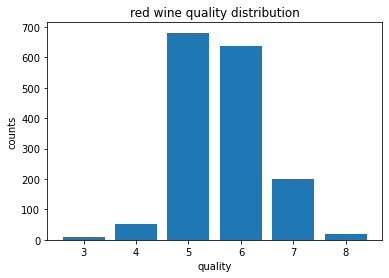

In [101]:
red_wine_quality = red_wine['quality'].value_counts().sort_index(ascending = True).index
red_wine_quality_counts = red_wine['quality'].value_counts().sort_index(ascending = True).values

fig, ax = plt.subplots()
ax.bar(red_wine_quality, red_wine_quality_counts)
ax.set_xlabel('quality')
ax.set_ylabel('counts')
ax.set_title('red wine quality distribution')
plt.show()

<h5> White wine </h5>

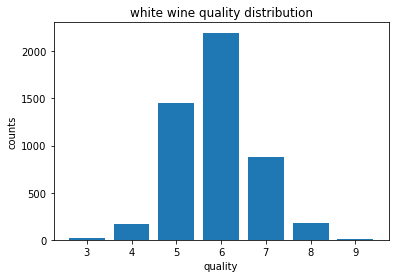

In [102]:

white_wine_quality = white_wine['quality'].value_counts().sort_index(ascending = True).index
white_wine_quality_counts = white_wine['quality'].value_counts().sort_index(ascending = True).values

fig, ax = plt.subplots()
ax.bar(white_wine_quality, white_wine_quality_counts)
ax.set_xlabel('quality')
ax.set_ylabel('counts')
ax.set_title('white wine quality distribution')
plt.show()

<h3> Check shape of distribution of individual features + skewness </h3>

<h3> White wine </h3>

In [103]:
features = list (white_wine.columns)
features.remove('quality')
features.remove('type')
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

<h3> White Wine Feature Distributions </h3>

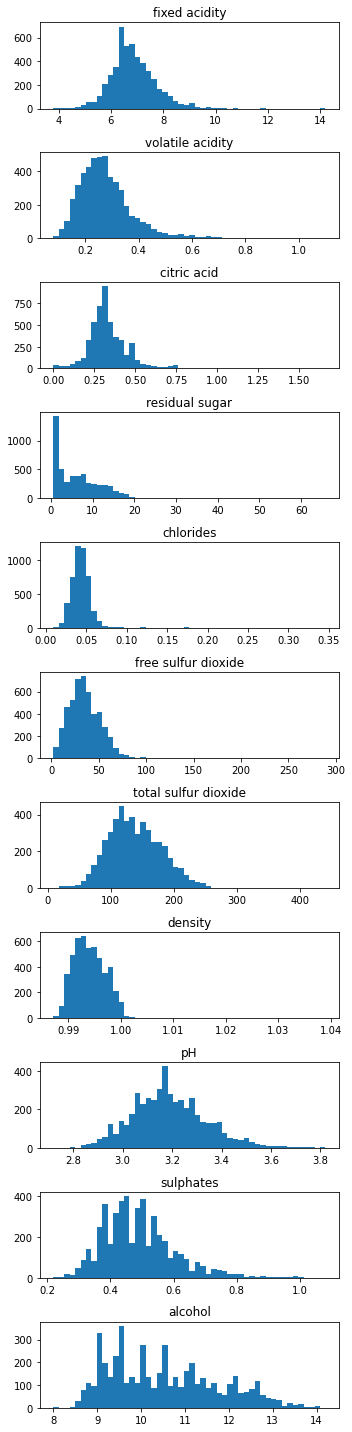

In [ ]:
fig, ax = plt.subplots(len(features), 1, figsize = (5, 20))

for i, feature in enumerate (features):
    ax[i].hist(white_wine[feature], bins = 50)
    ax[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()


<h5> White Wine Features that Don't Look Gaussian : </h5>

1. volatile acidity <br>
2. residual sugar <br>
3. chlorides <br>
4. free sulfur dioxide <br>
5. density <br>
6. sulphates <br>
7. alcohol


<h3> Skewness and Kertosis for Every White Wine Feature </h3>

We will consider the distribution to be normal for skewness in the range -2 to 2, and kertosis in the range -3 to 3 <br>

In [ ]:
# Compute skewness and kurtosis of all features
white_skewness = {}
white_kurtosis = {}

for feature in features:
    white_skewness[feature] = round (white_wine[feature].astype(float).skew() , 2)

for feature in features:
    white_kurtosis[feature] = round (white_wine[feature].astype(float).kurt() , 2)

for feature in features: 
    print (f'{feature} –––– skewness: {white_skewness[feature]}, kurtosis: {white_kurtosis[feature]}')


fixed acidity –––– skewness: 0.65, kurtosis: 2.17
volatile acidity –––– skewness: 1.58, kurtosis: 5.09
citric acid –––– skewness: 1.28, kurtosis: 6.17
residual sugar –––– skewness: 1.08, kurtosis: 3.47
chlorides –––– skewness: 5.02, kurtosis: 37.56
free sulfur dioxide –––– skewness: 1.41, kurtosis: 11.47
total sulfur dioxide –––– skewness: 0.39, kurtosis: 0.57
density –––– skewness: 0.98, kurtosis: 9.79
pH –––– skewness: 0.46, kurtosis: 0.53
sulphates –––– skewness: 0.98, kurtosis: 1.59
alcohol –––– skewness: 0.49, kurtosis: -0.7


Based on the skewness and kurtosis, the following features need transformation: 
1. 'volatile acidity' 
2. 'citric acid' 
3. 'residual sugar' 
4. 'chlorides'
5. 'free sulfur dioxide
6. 'density' 

<h5> Normalise 'volatile acidity' via transformation </h5>

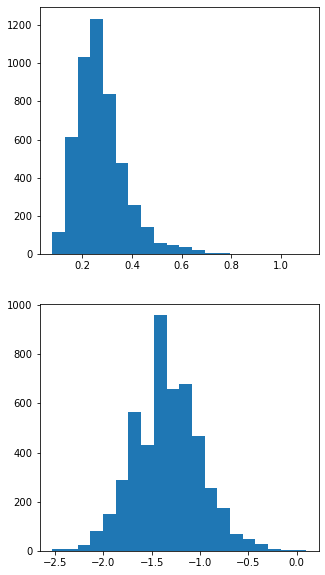

In [ ]:
white_vol_acid = white_wine['volatile acidity'].to_numpy()

t1 = np.log(white_vol_acid)                     # transform using log (x)

fig, ax = plt.subplots(2,1, figsize = (5, 10))
ax[0].hist(white_vol_acid, bins = 20)          # Plot original
ax[1].hist(t1, bins = 20)                      # Plot transformation
plt.show()




In [ ]:
pd.DataFrame(t1).skew(), pd.DataFrame(t1).kurt()

(0    0.139383
 dtype: float64,
 0    0.428343
 dtype: float64)

Excellent. Transforming 'volatile acidity' feature with log(x) function makes the plot Gaussian.

<h5> Normalise 'citric acid' via transformation </h5>

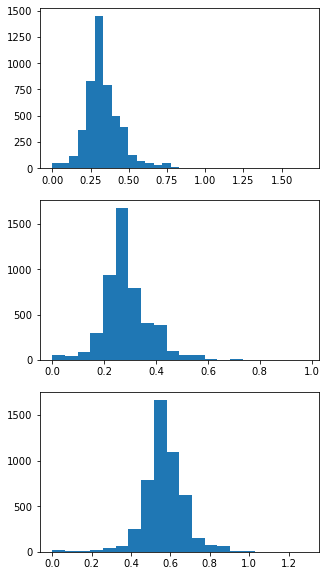

In [ ]:
white_citric_acid = white_wine['citric acid'].to_numpy()

t1 = np.log(white_citric_acid + 1)         # transform using log
t2 = np.sqrt(white_citric_acid)            # transform using sqrt 

fig, ax = plt.subplots(3,1, figsize = (5, 10))
ax[0].hist(white_citric_acid, bins = 30)          # Plot original
ax[1].hist(t1, bins = 20)                           # Plot t1
ax[2].hist(t2, bins = 20)                           # Plot t2

plt.show()

In [ ]:
# check t1 = log (x + 1)

pd.DataFrame(t1).skew(), pd.DataFrame(t1).kurt()

# Skewness and kurtosis both acceptable


(0    0.612357
 dtype: float64,
 0    2.89646
 dtype: float64)

In [ ]:
# check t2 = sqrt(x)

pd.DataFrame(t2).skew(), pd.DataFrame(t2).kurt()

# Skewdness is fine but kurtosis is a bit too large

(0   -0.426845
 dtype: float64,
 0    4.7865
 dtype: float64)

Transforming 'citric acid' feature with log(x+1) function makes the plot Gaussian.

<h5> Normalise residual sugar via transformation

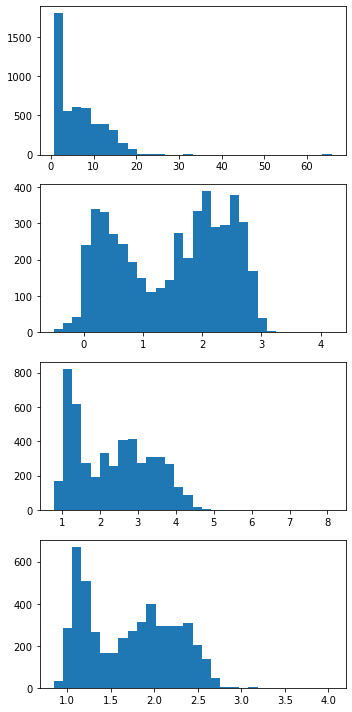

In [ ]:

white_res_sug = white_wine['residual sugar'].to_numpy()

t1 = np.log(white_res_sug)              # t1 = log(x)
t2 = np.sqrt(white_res_sug)            # t2 = sqrt(x)

power_degree = [(1/3) for i in range (len(white_res_sug))]

t3 = np.power(white_res_sug, power_degree)  # t3 = x ^ (1/3)

fig, ax = plt.subplots(4,1, figsize = (5, 10))
ax[0].hist(white_res_sug, bins = 30)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t2

plt.tight_layout()
plt.show()


OK frankly these are all terrible. But the sqrt function still seems to be the best option. 

<h5> Normalise 'chlorides' via transformation </h5>

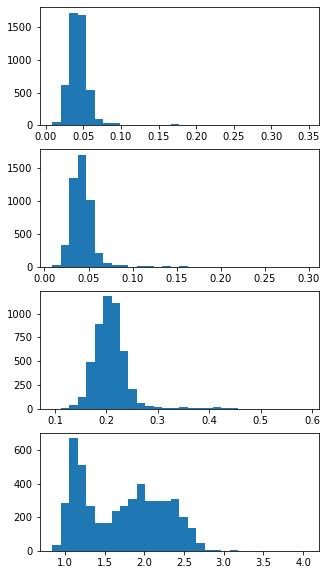

In [ ]:
white_chlorides = white_wine['chlorides'].to_numpy()

t1 = np.log(white_chlorides + 1)         # transform using log +1
t2 = np.sqrt(white_chlorides)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(white_res_sug))]

t3 = np.power(white_res_sug, power_degree)

fig, ax = plt.subplots(4,1, figsize = (5, 10))
ax[0].hist(white_chlorides, bins = 30)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

In [ ]:
pd.DataFrame(t2).skew(), pd.DataFrame(t2).kurt()

(0    2.850806
 dtype: float64,
 0    15.057037
 dtype: float64)

In [ ]:
pd.DataFrame(white_chlorides).skew(), pd.DataFrame(white_chlorides).kurt()

(0    5.023331
 dtype: float64,
 0    37.5646
 dtype: float64)

In [ ]:
pd.DataFrame(t1).skew(), pd.DataFrame(t1).kurt()

(0    4.626534
 dtype: float64,
 0    32.052148
 dtype: float64)

Not perfect, but for chlorides, sqrt offers best improvement. Kurtosis was always going to be high due to the extreme outliers.

<h5> Normalise 'free sulfur dioxide' via transformation </h5>

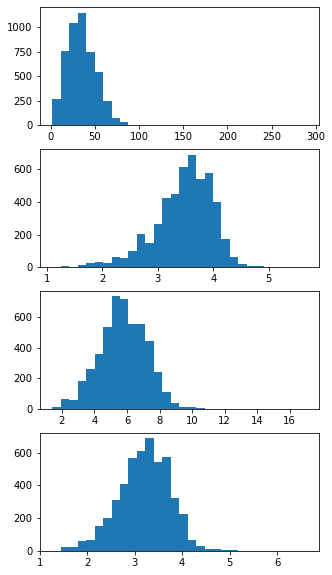

In [ ]:
white_free_sulf = white_wine['free sulfur dioxide'].to_numpy()

t1 = np.log(white_free_sulf + 1)         # transform using log
t2 = np.sqrt(white_free_sulf)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(white_res_sug))]

t3 = np.power(white_free_sulf, power_degree)

fig, ax = plt.subplots(4,1, figsize = (5, 10))
ax[0].hist(white_free_sulf, bins = 30)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

t2 (sqrt) seems best

In [ ]:
pd.DataFrame(t2).skew(), pd.DataFrame(t2).kurt()

(0    0.049692
 dtype: float64,
 0    0.841695
 dtype: float64)

Excellent. Can transform 'free sulfur dioxide' using sqrt(x) function

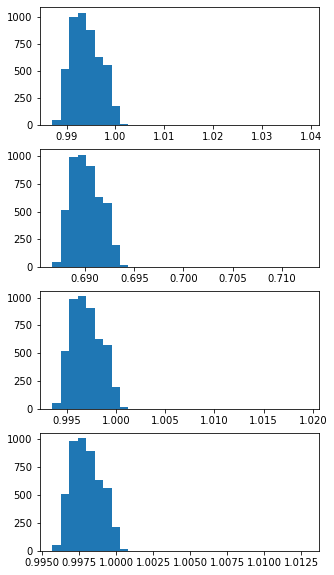

In [ ]:
white_density = white_wine['density'].to_numpy()

t1 = np.log(white_density + 1)         # transform using log
t2 = np.sqrt(white_density)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(white_density))]

t3 = np.power(white_density, power_degree)

fig, ax = plt.subplots(4,1, figsize = (5, 10))
ax[0].hist(white_density, bins = 30)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

None of the transformations really make a big difference, so we'll keep the original. <br>
Density has a high correlation with 'residual sugar' and 'alcohol', so we might drop it anyway.

<h3> Summary of transformations for white wine </h3> <h5> <br>
'volatile acidity' –> log (x) <br>
'citric acid' –> log (x+1)<br>
'residual sugar' –> sqrt(x)<br>
'chlorides' –> sqrt(x)<br>
'free sulfur dioxide' –> sqrt(x)
</h5>

<h3> Add normalised feature values to dataframe </h3>

In [104]:
# Create new dataframe for white wine to hold the transformed features
white_wine_trans = white_wine.copy()

In [105]:
# Transform relevant features

white_wine_trans ['volatile acidity'] = np.log(white_wine ['volatile acidity'])
white_wine_trans ['citric acid'] = np.log(white_wine ['citric acid'] + 1)
white_wine_trans ['residual sugar'] = np.sqrt(white_wine ['residual sugar'])
white_wine_trans ['chlorides'] = np.sqrt(white_wine ['chlorides'])
white_wine_trans ['free sulfur dioxide'] = np.sqrt(white_wine ['free sulfur dioxide'])

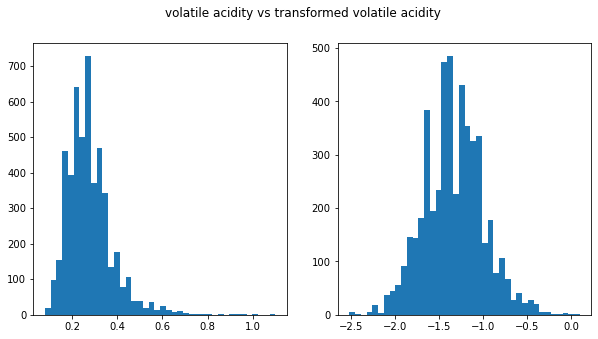

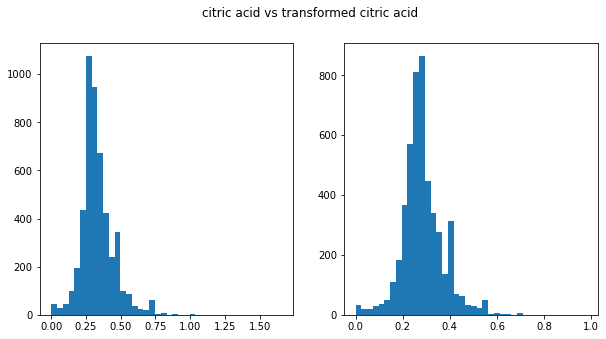

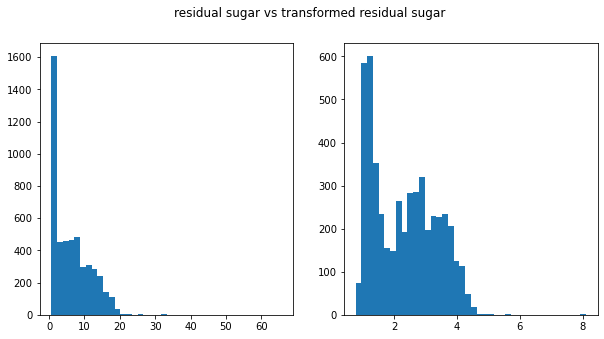

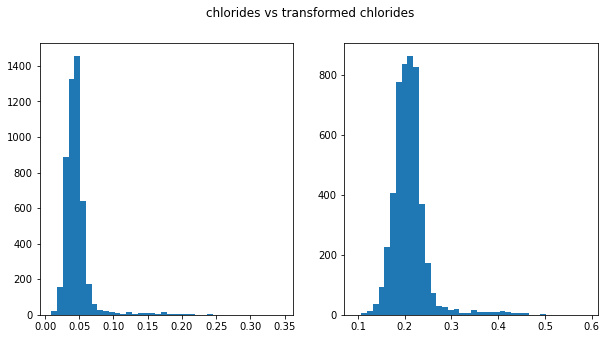

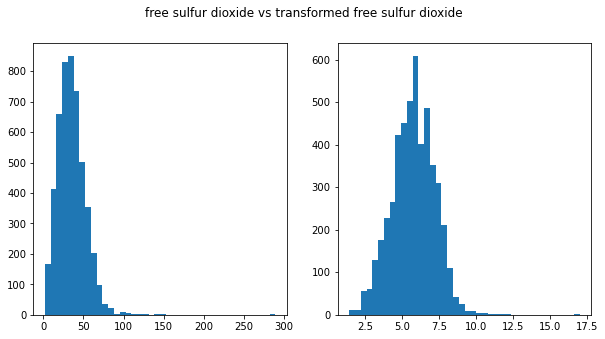

In [ ]:
# Plot 'before' and 'after' transformation

transformed_features = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']
for feature in transformed_features:
    fig, ax = plt.subplots(1,2, figsize = (10, 5))
    ax[0].hist(white_wine [feature], bins = 40)          
    ax[1].hist(white_wine_trans [feature], bins = 40)
    fig.suptitle(f'{feature} vs transformed {feature}')     
    plt.show()

<h3> Repeat for Red Wine </h3>

<h5> Check distribution of individual features </h5>

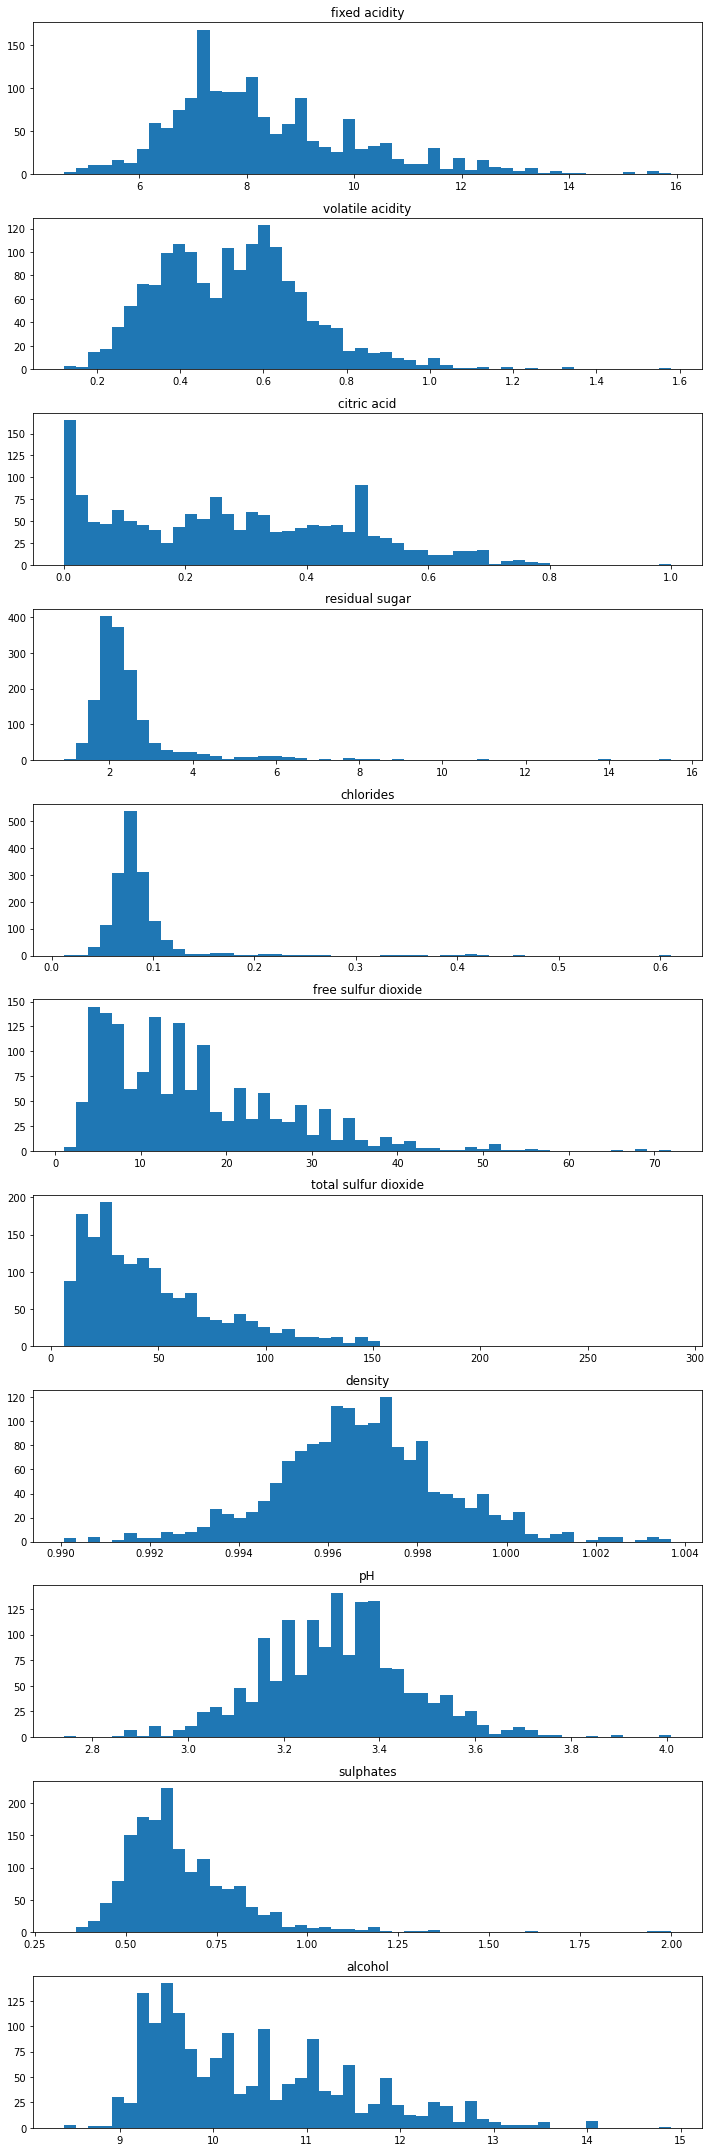

In [ ]:
fig, ax = plt.subplots(len(features), 1, figsize = (10, 30))

for i, feature in enumerate (features):
    ax[i].hist(red_wine[feature], bins = 50)
    ax[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Compute skewness of all features
red_skewness = {}
for feature in features:
    red_skewness[feature] = round (red_wine[feature].astype(float).skew() , 2)

# Compute kurtosis of all features
red_kurtosis = {}
for feature in features:
    red_kurtosis[feature] = round (red_wine[feature].astype(float).kurt() , 2)

for key in red_skewness: 
    print (f'{key} ---- skewness: {red_skewness[key]}, kurtosis: {red_kurtosis[key]}')

fixed acidity ---- skewness: 0.98, kurtosis: 1.13
volatile acidity ---- skewness: 0.67, kurtosis: 1.23
citric acid ---- skewness: 0.32, kurtosis: -0.79
residual sugar ---- skewness: 4.54, kurtosis: 28.62
chlorides ---- skewness: 5.68, kurtosis: 41.72
free sulfur dioxide ---- skewness: 1.25, kurtosis: 2.02
total sulfur dioxide ---- skewness: 1.52, kurtosis: 3.81
density ---- skewness: 0.07, kurtosis: 0.93
pH ---- skewness: 0.19, kurtosis: 0.81
sulphates ---- skewness: 2.43, kurtosis: 11.72
alcohol ---- skewness: 0.86, kurtosis: 0.2


In [ ]:
# Features 'residual sugar', 'chlorides', 'sulphates' seem to nee fixing the most.

In [ ]:
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

<h5> Transform red fixed acidity </h5>

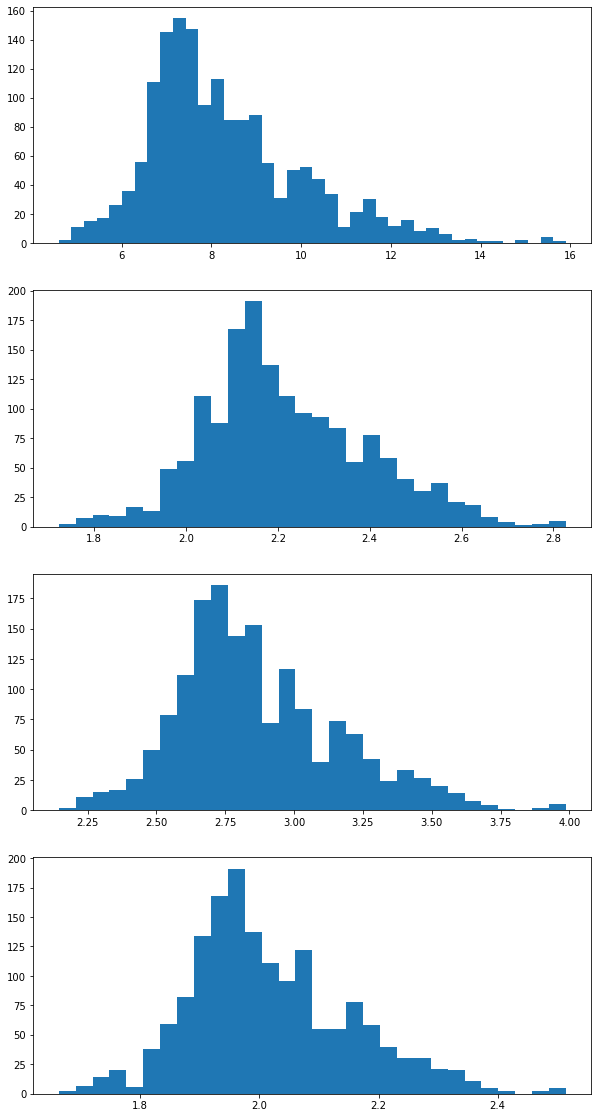

In [ ]:
red_fixed_acidity = red_wine['fixed acidity'].to_numpy()

t1 = np.log(red_fixed_acidity + 1)         # transform using log
t2 = np.sqrt(red_fixed_acidity)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_fixed_acidity))]

t3 = np.power(red_fixed_acidity, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_fixed_acidity, bins = 40)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

red wine, fixed acidity: transform with log(x + 1)

<h5> Transform volatile acidity </h5>

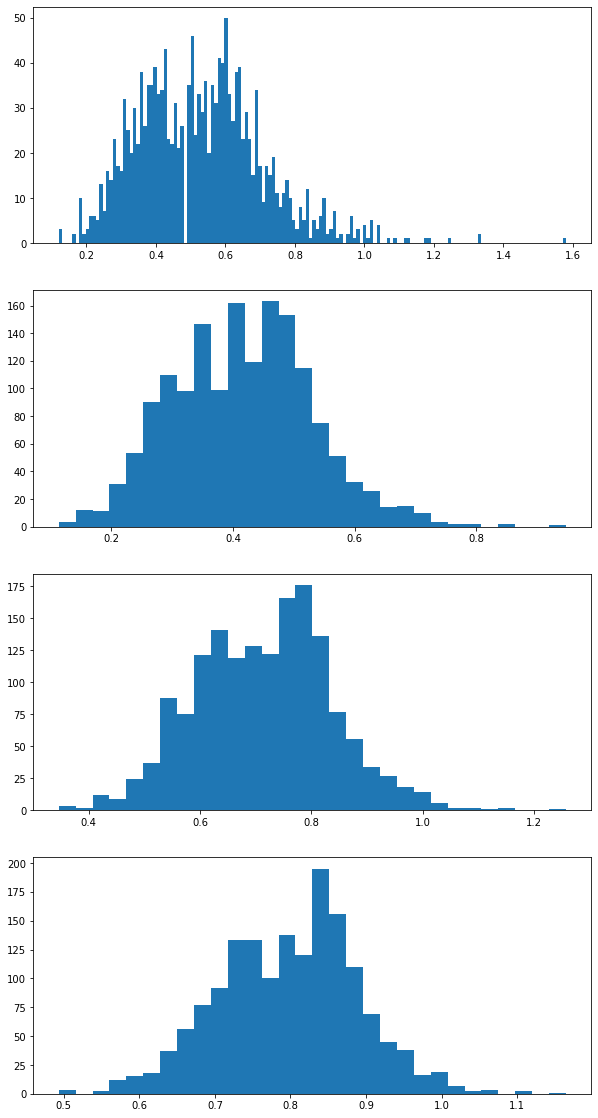

In [ ]:
red_volatile_acidity = red_wine['volatile acidity'].to_numpy()

t1 = np.log(red_volatile_acidity + 1)         # transform using log
t2 = np.sqrt(red_volatile_acidity)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_volatile_acidity))]

t3 = np.power(red_volatile_acidity, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_volatile_acidity, bins = 150)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

red wine, volatile acidity: transform with x ** (1/3)

<h5> Transform citric acid </h5>

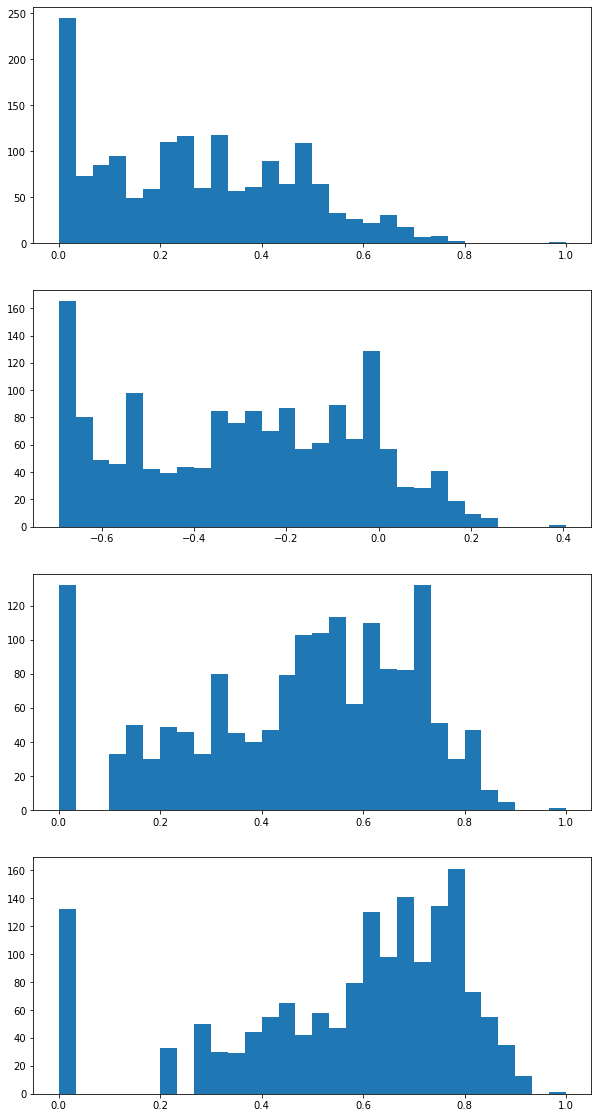

In [ ]:
red_citric_acid = red_wine['citric acid'].to_numpy()

t1 = np.log(red_citric_acid +0.5)         # transform using log
t2 = np.sqrt(red_citric_acid)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_citric_acid))]

t3 = np.power(red_citric_acid, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_citric_acid, bins = 30)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

None of the transforms really work. In particular, the peak at 0 is difficult to deal with. <br>
Leave the citric acid feature as is.

<h5> Transform residual sugar </h5>

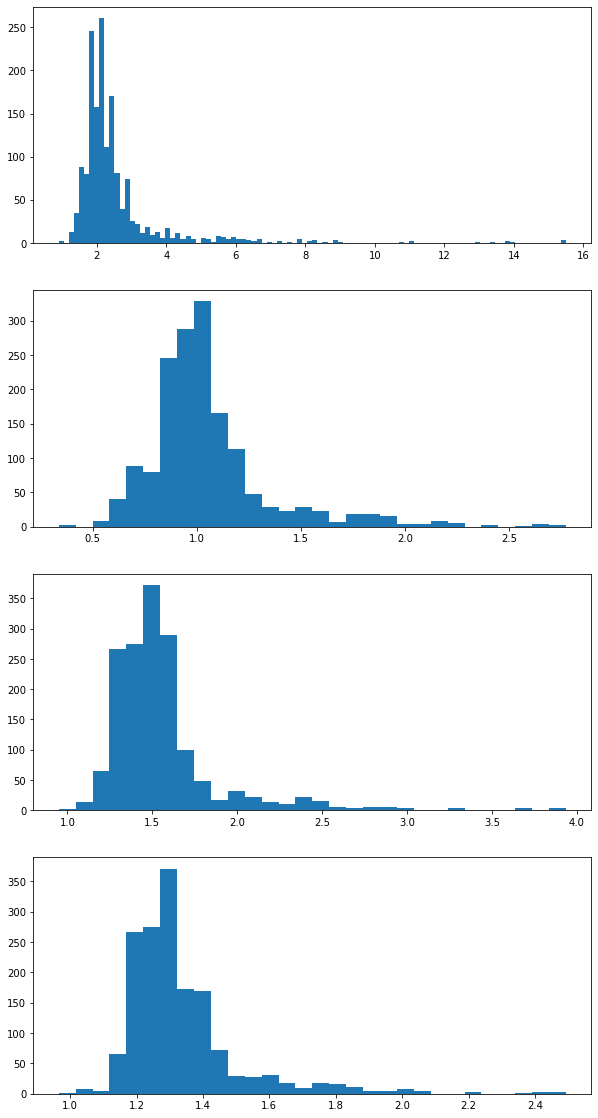

In [ ]:
red_residual_sugar = red_wine['residual sugar'].to_numpy()

t1 = np.log(red_residual_sugar +0.5)         # transform using log
t2 = np.sqrt(red_residual_sugar)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_residual_sugar))]

t3 = np.power(red_residual_sugar, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_residual_sugar, bins = 100)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

red wine, residual sugar: transform with log(x+1)

<h5> Transform chlorides </h5>

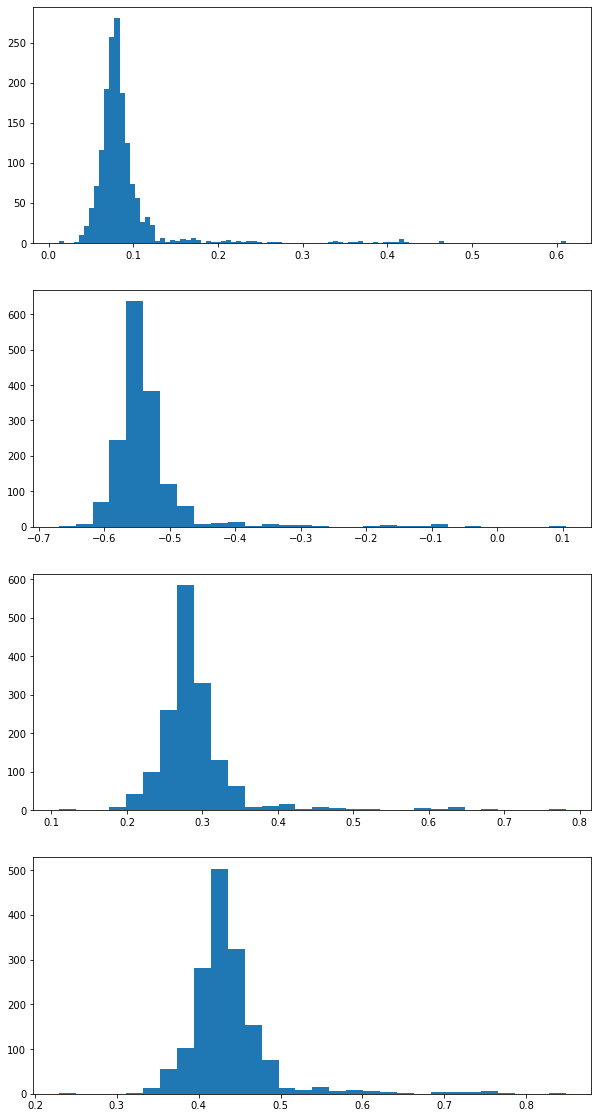

In [ ]:
red_chlorides = red_wine['chlorides'].to_numpy()

t1 = np.log(red_chlorides +0.5)         # transform using log
t2 = np.sqrt(red_chlorides)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_chlorides))]

t3 = np.power(red_chlorides, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_chlorides, bins = 100)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

red wine, chlorides: keep as is

<h5> Transform free sulfur dioxide </h5>

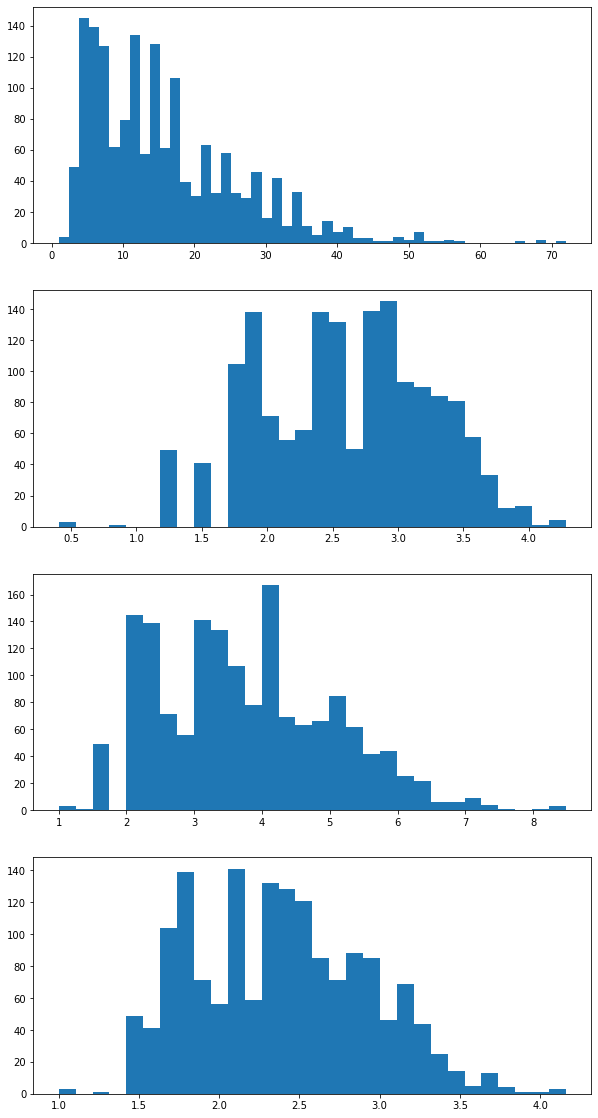

In [ ]:
red_free_sulf = red_wine['free sulfur dioxide'].to_numpy()

t1 = np.log(red_free_sulf +0.5)         # transform using log
t2 = np.sqrt(red_free_sulf)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_free_sulf))]

t3 = np.power(red_free_sulf, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_free_sulf, bins = 50)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

red wine, free sulfur dioxide: transform with sqrt(x)

<h5> Transform total sulfur dioxide </h5>

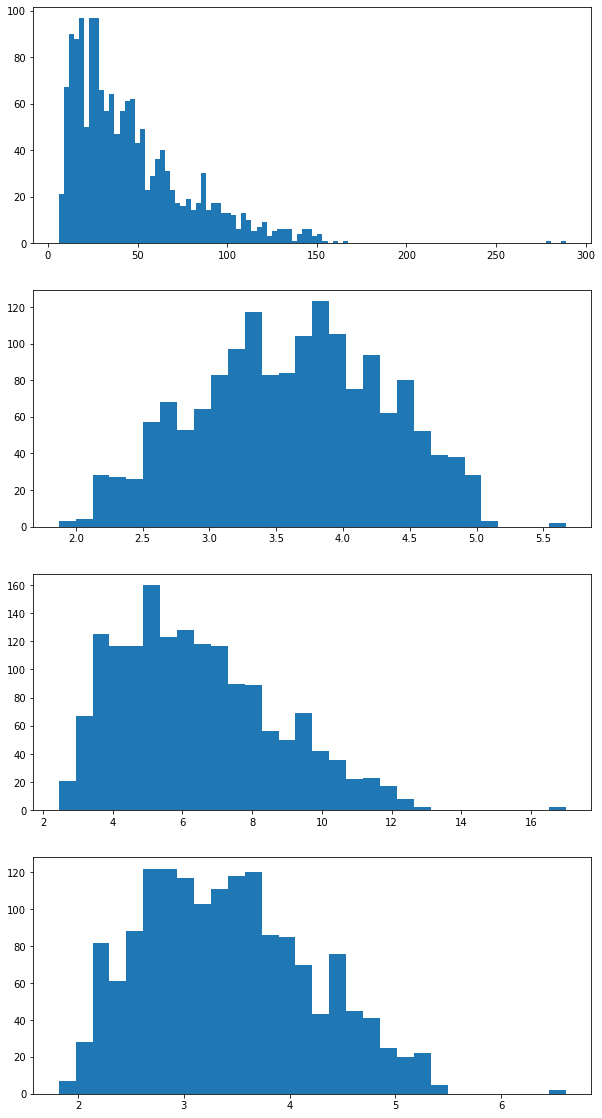

In [ ]:
red_total_sulf = red_wine['total sulfur dioxide'].to_numpy()

t1 = np.log(red_total_sulf +0.5)         # transform using log
t2 = np.sqrt(red_total_sulf)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_total_sulf))]

t3 = np.power(red_total_sulf, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_total_sulf, bins = 100)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

red, total sulfur dioxide: transform with log (x +1)

<h5> Transform density </h5>

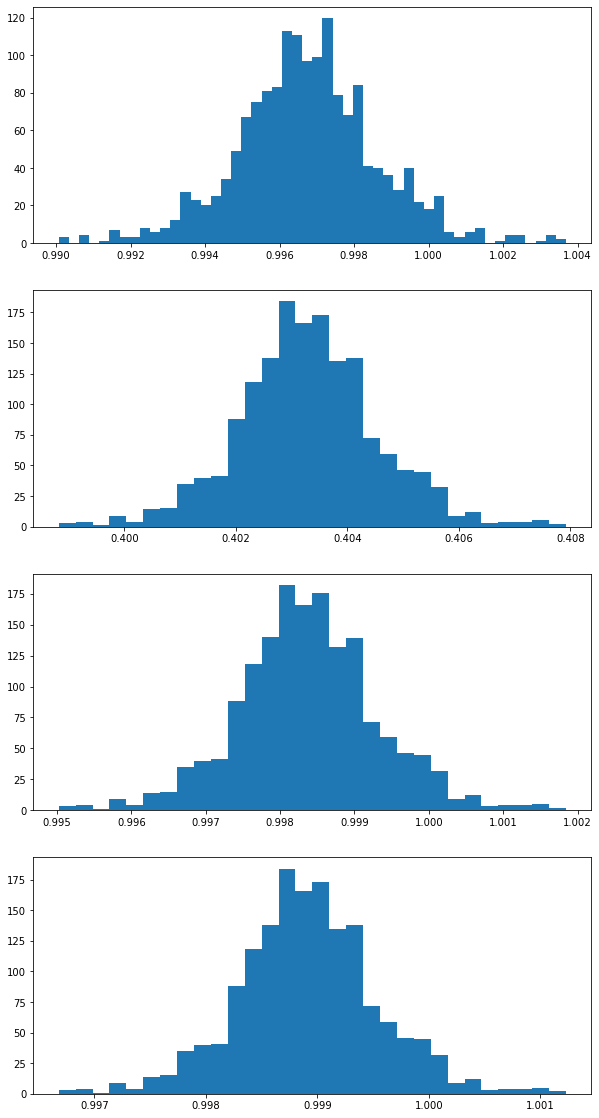

In [ ]:
red_density = red_wine['density'].to_numpy()

t1 = np.log(red_density +0.5)         # transform using log
t2 = np.sqrt(red_density)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_density))]

t3 = np.power(red_density, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_density, bins = 50)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

red wine, density: don't transform

<h5> Transform pH </h5>

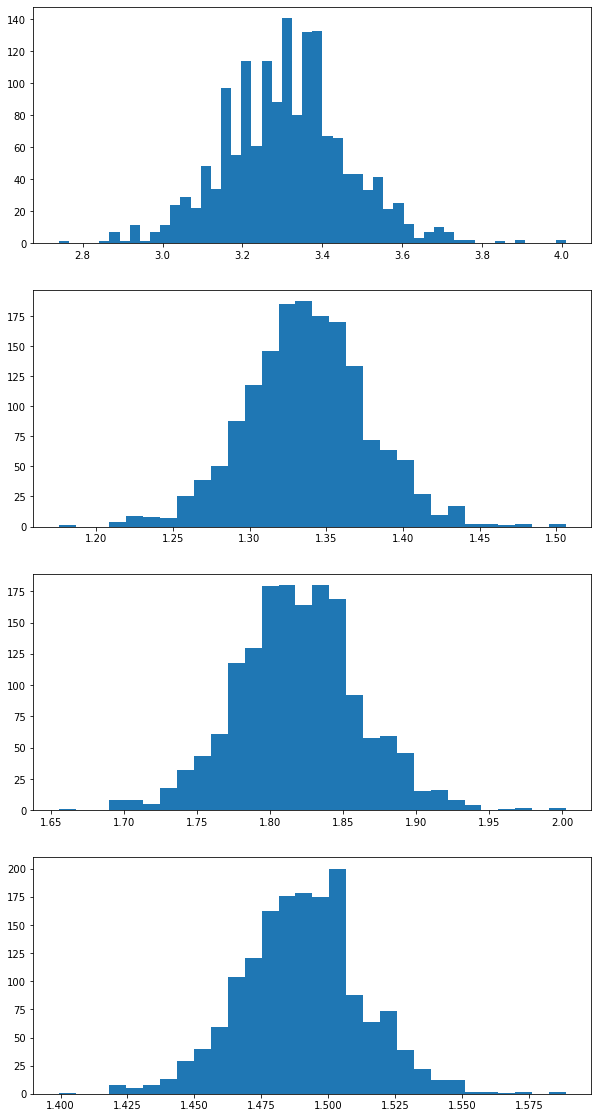

In [ ]:
red_pH = red_wine['pH'].to_numpy()

t1 = np.log(red_pH +0.5)         # transform using log
t2 = np.sqrt(red_pH)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_pH))]

t3 = np.power(red_pH, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_pH, bins = 50)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

red wine, pH: transform with log(x + 1)

<h5> Transform sulphates </h5>

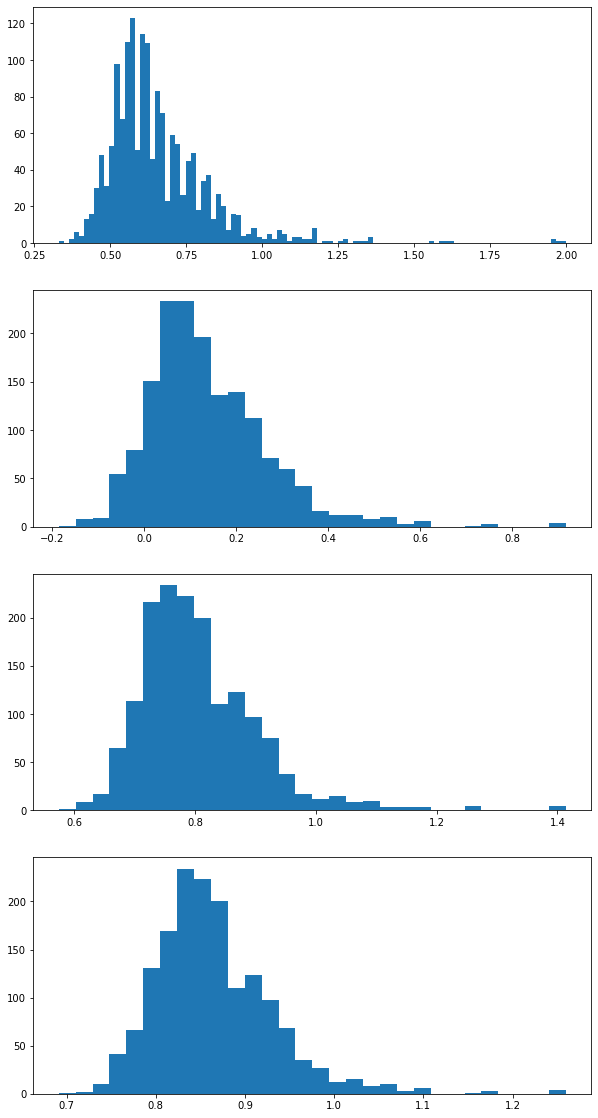

In [ ]:
red_sulphates = red_wine['sulphates'].to_numpy()

t1 = np.log(red_sulphates +0.5)         # transform using log
t2 = np.sqrt(red_sulphates)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_sulphates))]

t3 = np.power(red_sulphates, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_sulphates, bins = 100)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

red wine, sulphates: transform with log(x + 1)

<h5> Transform alcohol </h5>

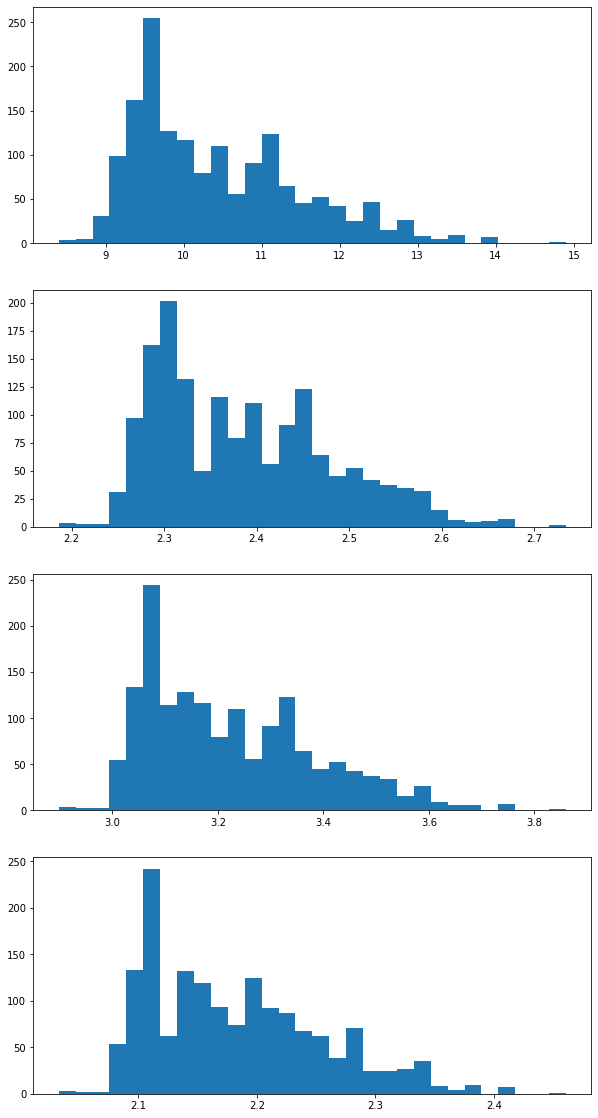

In [ ]:
red_alcohol = red_wine['alcohol'].to_numpy()

t1 = np.log(red_alcohol +0.5)         # transform using log
t2 = np.sqrt(red_alcohol)            # transform using sqrt 

power_degree = [(1/3) for i in range (len(red_alcohol))]

t3 = np.power(red_alcohol, power_degree)

fig, ax = plt.subplots(4,1, figsize = (10, 20))
ax[0].hist(red_alcohol, bins = 30)          # Plot original
ax[1].hist(t1, bins = 30)                           # Plot t1
ax[2].hist(t2, bins = 30)                           # Plot t2
ax[3].hist(t3, bins = 30)                           # Plot t3

plt.show()

red wine, alcohol: don't transform

<h3> Summary of Transformations to Undertake for Red Wine </h3> <br>

fixed acidity: transform with log(x + 1) <br>
volatile acidity: transform with x ** (1/3)<br>
citric acid: don't transform<br>
residual sugar: transform with log(x+1)<br>
chlorides: keep as is<br>
free sulfur dioxide: transform with sqrt(x)<br>
total sulfur dioxide: transform with log (x +1)<br>
density: don't transform<br>
pH: transform with log(x + 1)<br>
sulphates: transform with log(x + 1)<br>
alcohol: don't transform


In [106]:
# Create new dataframe to hold transformed data
red_wine_trans = red_wine.copy()

In [107]:
# Transform data

power_degree = [(1/3) for i in range (len(red_total_sulf))]

red_wine_trans['fixed acidity'] = np.log(red_wine['fixed acidity'] + 1)
red_wine_trans['volatile acidity'] = np.power(red_wine['volatile acidity'], power_degree)
red_wine_trans['residual sugar'] = np.log(red_wine['residual sugar'] + 1)
red_wine_trans['free sulfur dioxide'] = np.sqrt(red_wine['free sulfur dioxide'])
red_wine_trans['total sulfur dioxide'] = np.log(red_wine['total sulfur dioxide'] + 1)
red_wine_trans['pH'] = np.log(red_wine['pH'] + 1)
red_wine_trans['sulphates'] = np.log(red_wine['sulphates'] + 1)


Right. So what I've done so far is: <br><br>

start with:<br>
* white_wine<br>
* red_wine<br>

haven't yet divided into quality labels. <br><br>

Then I identified features that I can transform to make more Gaussian. <br>
Then I transformed the features. <br>
And saved as: <br>
* white_wine_trans<br>
* red_wine_trans<br>

And NOW I can divide white_wine, red_wine, white_wine_trans, red_wine_trans into different quality labels.

<h3> Definition of Quality Labels </h3>

<h3> Division 1: four quality labels </h3>

Will divide the quality ratings into four labels, and thereby create four new dataframes:

* white_wine_4Q<br>
* red_wine_4Q<br>
* white_wine_trans_4Q<br>
* red_wine_trans_4Q<br>

Classification boundaries: <br><br>

* 3 or 4      –>  low <br>
* 5           –>  lower middle <br>
* 6           –>  middle <br>
* 7           –>  upper middle <br>
* 8 or 9      –>  high <br>

<h5> Red Wine </h5>

In [108]:
red_wine_4Q = red_wine.copy()

In [109]:
red_wine_4Q['quality_label'] = red_wine_4Q['quality'].apply(lambda x: 'low' if x == 3 or x ==4 
                                                                        else 'lower_middle' if x == 5 
                                                                        else 'middle' if x==6 
                                                                        else 'upper_middle' if x ==7 
                                                                        else 'high')

In [110]:
red_wine_4Q['quality_label'].value_counts()

lower_middle    681
middle          638
upper_middle    199
low              63
high             18
Name: quality_label, dtype: int64

In [111]:
red_wine_trans_4Q = red_wine_trans.copy()

In [112]:
red_wine_trans_4Q['quality_label'] = red_wine_trans_4Q['quality'].apply(lambda x: 'low' if x == 3 or x ==4 
                                                                        else 'lower_middle' if x == 5 
                                                                        else 'middle' if x==6 
                                                                        else 'upper_middle' if x ==7 
                                                                        else 'high')

In [113]:
red_wine_trans_4Q['quality_label'].value_counts()

lower_middle    681
middle          638
upper_middle    199
low              63
high             18
Name: quality_label, dtype: int64

<h5> White Wine </h5>

In [114]:
white_wine_4Q = white_wine.copy()

In [115]:
white_wine_4Q['quality_label'] = white_wine_4Q['quality'].apply(lambda x: 'low' if x == 3 or x ==4 
                                                                        else 'lower_middle' if x == 5 
                                                                        else 'middle' if x==6 
                                                                        else 'upper_middle' if x ==7 
                                                                        else 'high')
white_wine_4Q['quality_label'].value_counts()

middle          2198
lower_middle    1457
upper_middle     880
low              183
high             180
Name: quality_label, dtype: int64

In [116]:
white_wine_trans_4Q = white_wine_trans.copy()

In [117]:
white_wine_trans_4Q['quality_label'] = white_wine_trans_4Q['quality'].apply(lambda x: 'low' if x == 3 or x ==4 
                                                                        else 'lower_middle' if x == 5 
                                                                        else 'middle' if x==6 
                                                                        else 'upper_middle' if x ==7 
                                                                        else 'high')
white_wine_trans_4Q['quality_label'].value_counts()

middle          2198
lower_middle    1457
upper_middle     880
low              183
high             180
Name: quality_label, dtype: int64

<h3> Division 2: three quality labels </h3>

Will divide the quality ratings into four labels, and thereby create four new dataframes:

* white_wine_3Q<br>
* red_wine_3Q<br>
* white_wine_trans_3Q<br>
* red_wine_trans_3Q<br>

Classification boundaries: <br><br>

* 5 or lower: low <br>
* 6         : medium <br>
* 7 or higher : high <br>

<h5> Red Wine </h5>

In [118]:
red_wine_3Q = red_wine.copy()

In [119]:
red_wine_3Q['quality_label'] = red_wine_3Q['quality'].apply(lambda x: 'low' if x <= 5 
                                                                        else 'medium' if x == 6 
                                                                        else 'high')

In [120]:
red_wine_3Q['quality_label'].value_counts()

low       744
medium    638
high      217
Name: quality_label, dtype: int64

In [121]:
red_wine_trans_3Q = red_wine_trans.copy()

In [122]:
red_wine_trans_3Q['quality_label'] = red_wine_trans_3Q['quality'].apply(lambda x: 'low' if x <= 5 
                                                                        else 'medium' if x == 6 
                                                                        else 'high')

In [123]:
red_wine_trans_3Q['quality_label'].value_counts()

low       744
medium    638
high      217
Name: quality_label, dtype: int64

<h5> White Wine </h5>

In [124]:
white_wine_3Q = white_wine.copy()

In [125]:
white_wine_3Q['quality_label'] = white_wine_3Q['quality'].apply(lambda x: 'low' if x <= 5 
                                                                        else 'medium' if x == 6 
                                                                        else 'high')
white_wine_3Q['quality_label'].value_counts()

medium    2198
low       1640
high      1060
Name: quality_label, dtype: int64

In [126]:
white_wine_trans_3Q = white_wine_trans.copy()

In [127]:
white_wine_trans_3Q['quality_label'] = white_wine_trans_3Q['quality'].apply(lambda x: 'low' if x <= 5 
                                                                        else 'medium' if x == 6 
                                                                        else 'high')
white_wine_trans_3Q['quality_label'].value_counts()

medium    2198
low       1640
high      1060
Name: quality_label, dtype: int64

Now we want to save the following dataframes: 

No quality labels

* white_wine
* red_wine

* white_wine_trans
* red_wine_trans

4 quality labels

* white_wine_4Q
* red_wine_4Q

* white_wine_trans_4Q
* red_wine_trans_4Q

3 quality labels

* white_wine_3Q
* red_wine_3Q

* white_wine_trans_3Q
* red_wine_trans_3Q

In [131]:
white_wine.to_csv('transformed_wine_data/white_wine.csv', index = False)
red_wine.to_csv('transformed_wine_data/red_wine.csv', index = False)

white_wine_trans.to_csv('transformed_wine_data/white_wine_trans.csv', index = False)
red_wine_trans.to_csv('transformed_wine_data/red_wine_trans.csv', index = False)

white_wine_4Q.to_csv('transformed_wine_data/white_wine_4Q.csv', index = False)
red_wine_4Q.to_csv('transformed_wine_data/red_wine_4Q.csv', index = False)

white_wine_trans_4Q.to_csv('transformed_wine_data/white_wine_trans_4Q.csv', index = False)
red_wine_trans_4Q.to_csv('transformed_wine_data/red_wine_trans_4Q.csv', index = False)

white_wine_3Q.to_csv('transformed_wine_data/white_wine_3Q.csv', index = False)
red_wine_3Q.to_csv('transformed_wine_data/red_wine_3Q.csv', index = False)

white_wine_trans_3Q.to_csv('transformed_wine_data/white_wine_trans_3Q.csv', index = False)
red_wine_trans_3Q.to_csv('transformed_wine_data/red_wine_trans_3Q.csv', index = False)

In [133]:
white_wine_trans_4Q['quality_label'].value_counts()

middle          2198
lower_middle    1457
upper_middle     880
low              183
high             180
Name: quality_label, dtype: int64